Neste Notebook construimos o modelo OMD sexuado com um morfo

## Modelo

Um só morfo, logo $f=1$
##### Equações OMD:
\begin{align}
\dfrac{dn}{dt} &= \left[r(\overline{z}) + \dfrac{1}{2}V\dfrac{\partial^2 r}{\partial z^2}|_{z = \overline{z}}\right]n, \\
\dfrac{df}{dt} &= 0\\
\dfrac{dV}{dt} &=V^2\dfrac{\partial^2 r}{\partial z^2}|_{z = \overline{z}} + V_M\\
\dfrac{d\overline{z}}{dt} &= V\dfrac{\partial r}{\partial z}|_{z = \overline{z}}\\
\phi(x) &= n \frac{1}{\sqrt{2\pi V}}e^{-\dfrac{(x-\overline{z})^2}{2V}}\\
\end{align}

##### Equações sobre sexualidade e reprodução:
\begin{align}
A(u,v) &=\frac{1}{2\pi\sigma_A^2}e^{-\dfrac{(u-v)^2}{\sigma^2_A}} \\
N_{(u+v)/2,\sigma_f}(x) &= \frac{1}{\sqrt{2\pi}\sigma_f}e^{-\dfrac{1}{2}\Big(\dfrac{x-\frac{(u+v)}{2}}{\sigma_f}\Big)^2} \\
N(u) &=\int A(u,v)\phi(v)dv \\
\beta(x) &= \int\phi(u)\Big[\frac{1}{N(u)}\int\phi(v)A(u,v)N_{(u+v)/2,\sigma_f}(x)dv \Big]du
\end{align}

##### Equações dinâmica da população:
\begin{align}
r(x) &= \beta(x)b(x)/\phi(x) - d(x)\\
b(x) &= b_0 - sx^2\\
d(x) &= d_0 + n c(\overline{z}-x)\\
c(x) &= exp\left(-\frac{
x^2}{2w^2}\right) \\
\end{align}

In [1]:
#Importando bibliotecas
%matplotlib inline
from sympy import *
import numpy as np
from numpy import sin, exp, sqrt, pi
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint, quad, dblquad
from scipy.integrate import trapezoid as trapz
import warnings

## Solucionando com Sympy

In [2]:
#variáveis
n, V, sigmaA, sigmaf, b0, d0 = symbols("n, V, sigma_A, sigma_f, b_0, d_0", real=True, positive=True)
z, u, v, x, s, w = symbols("\overline{z}, u, v, x, s, w", real =True)

In [3]:
#equações
phix = n/sqrt(2*pi*V) * exp(-(x-z)**2/(2*V))
phiv = phix.subs(x, v)
phiu = phix.subs(x, u)
Auv = 1/(2*pi*sigmaA**2) * exp(-(u-v)**2/sigmaA**2)
Nfilhox = 1/(sqrt(2*pi)*sigmaf) * exp(- ((x - (u+v)/2)/sigmaf)**2/2)
bx = b0 - s*x**2
czmenosx = exp(-x**2/(2 * w**2))
dx = d0 + n * czmenosx

In [4]:
#integral
Intdentro = simplify(simplify(integrate(phiv * Auv * Nfilhox, (v, -oo, oo))))
Nu = simplify(simplify(integrate(Auv * phiv, (v, -oo, oo))))

In [5]:
%%time
#calculo de beta
betax = simplify(simplify(integrate(phiu / Nu * Intdentro, (u, -oo, oo))))

CPU times: total: 51min 53s
Wall time: 54min 35s


In [6]:
%%time
#calculo de r
rx = betax * bx / phix - dx

CPU times: total: 31.2 ms
Wall time: 30 ms


In [7]:
%%time
#derivada de r
drx = diff(rx, x)

CPU times: total: 156 ms
Wall time: 179 ms


In [8]:
%%time
#segunda derivada de r
d2rx = diff(drx, x)

CPU times: total: 516 ms
Wall time: 509 ms


In [9]:
%%time
#calculo de dn
dn = (rx.subs(x, z)+V*d2rx.subs(x,z)/2)*n

CPU times: total: 188 ms
Wall time: 184 ms


In [10]:
%%time
#calculo de dV
dV = V**2*d2rx.subs(x,z)

CPU times: total: 0 ns
Wall time: 1 ms


In [11]:
%%time
#calculo de dz
dz = V*drx.subs(x,z)

CPU times: total: 31.2 ms
Wall time: 18 ms


In [12]:
#visualizando beta
betax

n*(8*V**3*x + 4*V**2*sigma_A**2*x + sigma_A**2*(2*V**2*x + V*sigma_A**2*x + \overline{z}*(-V**2 + 4*V*sigma_f**2 + 2*sigma_A**2*sigma_f**2)))*sqrt(512*V**12*sigma_A**6 + 12288*V**12*sigma_A**4*sigma_f**2 + 98304*V**12*sigma_A**2*sigma_f**4 + 262144*V**12*sigma_f**6 + 1408*V**11*sigma_A**8 + 39936*V**11*sigma_A**6*sigma_f**2 + 368640*V**11*sigma_A**4*sigma_f**4 + 1114112*V**11*sigma_A**2*sigma_f**6 + 1672*V**10*sigma_A**10 + 57536*V**10*sigma_A**8*sigma_f**2 + 628224*V**10*sigma_A**6*sigma_f**4 + 2232320*V**10*sigma_A**4*sigma_f**6 + 262144*V**10*sigma_A**2*sigma_f**8 + 1116*V**9*sigma_A**12 + 48192*V**9*sigma_A**10*sigma_f**2 + 641280*V**9*sigma_A**8*sigma_f**4 + 2785280*V**9*sigma_A**6*sigma_f**6 + 1081344*V**9*sigma_A**4*sigma_f**8 + 454*V**8*sigma_A**14 + 25760*V**8*sigma_A**12*sigma_f**2 + 433280*V**8*sigma_A**10*sigma_f**4 + 2390016*V**8*sigma_A**8*sigma_f**6 + 2007040*V**8*sigma_A**6*sigma_f**8 + 65536*V**8*sigma_A**4*sigma_f**10 + 113*V**7*sigma_A**16 + 9024*V**7*sigma_A**14*sig

In [13]:
#visualizando r
rx

sqrt(2)*sqrt(V)*(b_0 - s*x**2)*(8*V**3*x + 4*V**2*sigma_A**2*x + sigma_A**2*(2*V**2*x + V*sigma_A**2*x + \overline{z}*(-V**2 + 4*V*sigma_f**2 + 2*sigma_A**2*sigma_f**2)))*sqrt(512*V**12*sigma_A**6 + 12288*V**12*sigma_A**4*sigma_f**2 + 98304*V**12*sigma_A**2*sigma_f**4 + 262144*V**12*sigma_f**6 + 1408*V**11*sigma_A**8 + 39936*V**11*sigma_A**6*sigma_f**2 + 368640*V**11*sigma_A**4*sigma_f**4 + 1114112*V**11*sigma_A**2*sigma_f**6 + 1672*V**10*sigma_A**10 + 57536*V**10*sigma_A**8*sigma_f**2 + 628224*V**10*sigma_A**6*sigma_f**4 + 2232320*V**10*sigma_A**4*sigma_f**6 + 262144*V**10*sigma_A**2*sigma_f**8 + 1116*V**9*sigma_A**12 + 48192*V**9*sigma_A**10*sigma_f**2 + 641280*V**9*sigma_A**8*sigma_f**4 + 2785280*V**9*sigma_A**6*sigma_f**6 + 1081344*V**9*sigma_A**4*sigma_f**8 + 454*V**8*sigma_A**14 + 25760*V**8*sigma_A**12*sigma_f**2 + 433280*V**8*sigma_A**10*sigma_f**4 + 2390016*V**8*sigma_A**8*sigma_f**6 + 2007040*V**8*sigma_A**6*sigma_f**8 + 65536*V**8*sigma_A**4*sigma_f**10 + 113*V**7*sigma_A**1

In [14]:
#visualizando derivada de r
drx

-2*sqrt(2)*sqrt(V)*s*x*(8*V**3*x + 4*V**2*sigma_A**2*x + sigma_A**2*(2*V**2*x + V*sigma_A**2*x + \overline{z}*(-V**2 + 4*V*sigma_f**2 + 2*sigma_A**2*sigma_f**2)))*sqrt(512*V**12*sigma_A**6 + 12288*V**12*sigma_A**4*sigma_f**2 + 98304*V**12*sigma_A**2*sigma_f**4 + 262144*V**12*sigma_f**6 + 1408*V**11*sigma_A**8 + 39936*V**11*sigma_A**6*sigma_f**2 + 368640*V**11*sigma_A**4*sigma_f**4 + 1114112*V**11*sigma_A**2*sigma_f**6 + 1672*V**10*sigma_A**10 + 57536*V**10*sigma_A**8*sigma_f**2 + 628224*V**10*sigma_A**6*sigma_f**4 + 2232320*V**10*sigma_A**4*sigma_f**6 + 262144*V**10*sigma_A**2*sigma_f**8 + 1116*V**9*sigma_A**12 + 48192*V**9*sigma_A**10*sigma_f**2 + 641280*V**9*sigma_A**8*sigma_f**4 + 2785280*V**9*sigma_A**6*sigma_f**6 + 1081344*V**9*sigma_A**4*sigma_f**8 + 454*V**8*sigma_A**14 + 25760*V**8*sigma_A**12*sigma_f**2 + 433280*V**8*sigma_A**10*sigma_f**4 + 2390016*V**8*sigma_A**8*sigma_f**6 + 2007040*V**8*sigma_A**6*sigma_f**8 + 65536*V**8*sigma_A**4*sigma_f**10 + 113*V**7*sigma_A**16 + 9024

In [15]:
#visualizando segunda derivada de r
d2rx

-4*sqrt(2)*sqrt(V)*s*x*(-8*V**3 - 6*V**2*sigma_A**2 - V*sigma_A**4)*(8*V**3*x + 4*V**2*sigma_A**2*x + sigma_A**2*(2*V**2*x + V*sigma_A**2*x + \overline{z}*(-V**2 + 4*V*sigma_f**2 + 2*sigma_A**2*sigma_f**2)))*sqrt(512*V**12*sigma_A**6 + 12288*V**12*sigma_A**4*sigma_f**2 + 98304*V**12*sigma_A**2*sigma_f**4 + 262144*V**12*sigma_f**6 + 1408*V**11*sigma_A**8 + 39936*V**11*sigma_A**6*sigma_f**2 + 368640*V**11*sigma_A**4*sigma_f**4 + 1114112*V**11*sigma_A**2*sigma_f**6 + 1672*V**10*sigma_A**10 + 57536*V**10*sigma_A**8*sigma_f**2 + 628224*V**10*sigma_A**6*sigma_f**4 + 2232320*V**10*sigma_A**4*sigma_f**6 + 262144*V**10*sigma_A**2*sigma_f**8 + 1116*V**9*sigma_A**12 + 48192*V**9*sigma_A**10*sigma_f**2 + 641280*V**9*sigma_A**8*sigma_f**4 + 2785280*V**9*sigma_A**6*sigma_f**6 + 1081344*V**9*sigma_A**4*sigma_f**8 + 454*V**8*sigma_A**14 + 25760*V**8*sigma_A**12*sigma_f**2 + 433280*V**8*sigma_A**10*sigma_f**4 + 2390016*V**8*sigma_A**8*sigma_f**6 + 2007040*V**8*sigma_A**6*sigma_f**8 + 65536*V**8*sigma_A

In [16]:
#Por dn ser muito grande, preferi por escrever em código
print(dn)

n*(sqrt(2)*sqrt(V)*(-\overline{z}**2*s + b_0)*(8*V**3*\overline{z} + 4*V**2*\overline{z}*sigma_A**2 + sigma_A**2*(2*V**2*\overline{z} + V*\overline{z}*sigma_A**2 + \overline{z}*(-V**2 + 4*V*sigma_f**2 + 2*sigma_A**2*sigma_f**2)))*sqrt(512*V**12*sigma_A**6 + 12288*V**12*sigma_A**4*sigma_f**2 + 98304*V**12*sigma_A**2*sigma_f**4 + 262144*V**12*sigma_f**6 + 1408*V**11*sigma_A**8 + 39936*V**11*sigma_A**6*sigma_f**2 + 368640*V**11*sigma_A**4*sigma_f**4 + 1114112*V**11*sigma_A**2*sigma_f**6 + 1672*V**10*sigma_A**10 + 57536*V**10*sigma_A**8*sigma_f**2 + 628224*V**10*sigma_A**6*sigma_f**4 + 2232320*V**10*sigma_A**4*sigma_f**6 + 262144*V**10*sigma_A**2*sigma_f**8 + 1116*V**9*sigma_A**12 + 48192*V**9*sigma_A**10*sigma_f**2 + 641280*V**9*sigma_A**8*sigma_f**4 + 2785280*V**9*sigma_A**6*sigma_f**6 + 1081344*V**9*sigma_A**4*sigma_f**8 + 454*V**8*sigma_A**14 + 25760*V**8*sigma_A**12*sigma_f**2 + 433280*V**8*sigma_A**10*sigma_f**4 + 2390016*V**8*sigma_A**8*sigma_f**6 + 2007040*V**8*sigma_A**6*sigma_f**

In [17]:
#Por dV ser muito grande, preferi por escrever em código
print(dV)

V**2*(-4*sqrt(2)*sqrt(V)*\overline{z}*s*(-8*V**3 - 6*V**2*sigma_A**2 - V*sigma_A**4)*(8*V**3*\overline{z} + 4*V**2*\overline{z}*sigma_A**2 + sigma_A**2*(2*V**2*\overline{z} + V*\overline{z}*sigma_A**2 + \overline{z}*(-V**2 + 4*V*sigma_f**2 + 2*sigma_A**2*sigma_f**2)))*sqrt(512*V**12*sigma_A**6 + 12288*V**12*sigma_A**4*sigma_f**2 + 98304*V**12*sigma_A**2*sigma_f**4 + 262144*V**12*sigma_f**6 + 1408*V**11*sigma_A**8 + 39936*V**11*sigma_A**6*sigma_f**2 + 368640*V**11*sigma_A**4*sigma_f**4 + 1114112*V**11*sigma_A**2*sigma_f**6 + 1672*V**10*sigma_A**10 + 57536*V**10*sigma_A**8*sigma_f**2 + 628224*V**10*sigma_A**6*sigma_f**4 + 2232320*V**10*sigma_A**4*sigma_f**6 + 262144*V**10*sigma_A**2*sigma_f**8 + 1116*V**9*sigma_A**12 + 48192*V**9*sigma_A**10*sigma_f**2 + 641280*V**9*sigma_A**8*sigma_f**4 + 2785280*V**9*sigma_A**6*sigma_f**6 + 1081344*V**9*sigma_A**4*sigma_f**8 + 454*V**8*sigma_A**14 + 25760*V**8*sigma_A**12*sigma_f**2 + 433280*V**8*sigma_A**10*sigma_f**4 + 2390016*V**8*sigma_A**8*sigma_f

In [18]:
#Por dz ser muito grande, preferi por escrever em código
print(dz)

V*(-2*sqrt(2)*sqrt(V)*\overline{z}*s*(8*V**3*\overline{z} + 4*V**2*\overline{z}*sigma_A**2 + sigma_A**2*(2*V**2*\overline{z} + V*\overline{z}*sigma_A**2 + \overline{z}*(-V**2 + 4*V*sigma_f**2 + 2*sigma_A**2*sigma_f**2)))*sqrt(512*V**12*sigma_A**6 + 12288*V**12*sigma_A**4*sigma_f**2 + 98304*V**12*sigma_A**2*sigma_f**4 + 262144*V**12*sigma_f**6 + 1408*V**11*sigma_A**8 + 39936*V**11*sigma_A**6*sigma_f**2 + 368640*V**11*sigma_A**4*sigma_f**4 + 1114112*V**11*sigma_A**2*sigma_f**6 + 1672*V**10*sigma_A**10 + 57536*V**10*sigma_A**8*sigma_f**2 + 628224*V**10*sigma_A**6*sigma_f**4 + 2232320*V**10*sigma_A**4*sigma_f**6 + 262144*V**10*sigma_A**2*sigma_f**8 + 1116*V**9*sigma_A**12 + 48192*V**9*sigma_A**10*sigma_f**2 + 641280*V**9*sigma_A**8*sigma_f**4 + 2785280*V**9*sigma_A**6*sigma_f**6 + 1081344*V**9*sigma_A**4*sigma_f**8 + 454*V**8*sigma_A**14 + 25760*V**8*sigma_A**12*sigma_f**2 + 433280*V**8*sigma_A**10*sigma_f**4 + 2390016*V**8*sigma_A**8*sigma_f**6 + 2007040*V**8*sigma_A**6*sigma_f**8 + 65536

## Gerando gráficos

In [2]:
#Definindo funções
def normal(z, zbar, V):
    return 1 / np.sqrt(2*np.pi*V) * np.exp(-(z-zbar)**2/(2*V))

def densidade(z, x, qtdz):
    soma = 0
    for j in range(qtdz):
        soma += x[1+j] * normal(z, x[1+2*qtdz+j], x[1+qtdz+j])
    return x[0] * soma

In [8]:
#Parametros
temp = 50
b0 = 1
s = 0.1
w = 2
d0 = 0.001
VM = 1e-5
qtdz = 1
vsigmaA = [1e-2, 2e-2, 3e-2, 4e-2]
sigmaf = 1e-3
xmax = 3.

t = np.arange(0, temp, 5)
z = np.arange(-1.5, 1.5, 0.01)

#n-0 f1-1 V1-2 z1barra-3
x0 = np.array([1., 1, 0.01, -0.01])

In [4]:
#Definindo modelo OMD sexuado 1 pico
def cria_modelo_OMD_1_pico(b0, s, d0, w, sigmaA, sigmaf):
    def dn(n, z, V):
        return n*(sqrt(2)*sqrt(V)*(-z**2*s + b0)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + V*(-4*sqrt(2)*sqrt(V)*z*s*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**2*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) - 4*sqrt(2)*sqrt(V)*z*s*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) - 2*sqrt(2)*sqrt(V)*s*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*sqrt(V)*(-z**2*s + b0)*(-16*V**3 - 12*V**2*sigmaA**2 - 2*V*sigmaA**4)*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**3*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + 2*sqrt(2)*sqrt(V)*(-z**2*s + b0)*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**2*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) - z**2*n*exp(-z**2/(2*w**2))/w**4 + n*exp(-z**2/(2*w**2))/w**2 - 2*sqrt(2)*z*s*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(sqrt(V)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V + 2*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 4*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(2*sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**2*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(4*V**(3/2)*(2*V + sigmaA**2)**4*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**11*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**3*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)))/2 - d0 - n*exp(-z**2/(2*w**2)))
    def dV(n, z, V):
        return V**2*(-4*sqrt(2)*sqrt(V)*z*s*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**2*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) - 4*sqrt(2)*sqrt(V)*z*s*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) - 2*sqrt(2)*sqrt(V)*s*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*sqrt(V)*(-z**2*s + b0)*(-16*V**3 - 12*V**2*sigmaA**2 - 2*V*sigmaA**4)*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**3*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + 2*sqrt(2)*sqrt(V)*(-z**2*s + b0)*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**2*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) - z**2*n*exp(-z**2/(2*w**2))/w**4 + n*exp(-z**2/(2*w**2))/w**2 - 2*sqrt(2)*z*s*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(sqrt(V)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V + 2*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 4*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(2*sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**2*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(4*V**(3/2)*(2*V + sigmaA**2)**4*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**11*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**3*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)))
    def dz(n, z, V):
        return V*(-2*sqrt(2)*sqrt(V)*z*s*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*sqrt(V)*(-z**2*s + b0)*(-8*V**3 - 6*V**2*sigmaA**2 - V*sigmaA**4)*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)**2*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + sqrt(2)*sqrt(V)*(-z**2*s + b0)*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/((V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)) + z*n*exp(-z**2/(2*w**2))/w**2 + sqrt(2)*(-z**2*s + b0)*(-4*V*(2*V + sigmaA**2)**2*(4*V*z + z*sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(2*V*sigmaA**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 16*V*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)) + 8*sigmaA**2*sigmaf**2*(8*V**3 + 4*V**2*sigmaA**2 + sigmaA**2*(2*V**2 + V*sigmaA**2)))*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2)))*sqrt(512*V**12*sigmaA**6 + 12288*V**12*sigmaA**4*sigmaf**2 + 98304*V**12*sigmaA**2*sigmaf**4 + 262144*V**12*sigmaf**6 + 1408*V**11*sigmaA**8 + 39936*V**11*sigmaA**6*sigmaf**2 + 368640*V**11*sigmaA**4*sigmaf**4 + 1114112*V**11*sigmaA**2*sigmaf**6 + 1672*V**10*sigmaA**10 + 57536*V**10*sigmaA**8*sigmaf**2 + 628224*V**10*sigmaA**6*sigmaf**4 + 2232320*V**10*sigmaA**4*sigmaf**6 + 262144*V**10*sigmaA**2*sigmaf**8 + 1116*V**9*sigmaA**12 + 48192*V**9*sigmaA**10*sigmaf**2 + 641280*V**9*sigmaA**8*sigmaf**4 + 2785280*V**9*sigmaA**6*sigmaf**6 + 1081344*V**9*sigmaA**4*sigmaf**8 + 454*V**8*sigmaA**14 + 25760*V**8*sigmaA**12*sigmaf**2 + 433280*V**8*sigmaA**10*sigmaf**4 + 2390016*V**8*sigmaA**8*sigmaf**6 + 2007040*V**8*sigmaA**6*sigmaf**8 + 65536*V**8*sigmaA**4*sigmaf**10 + 113*V**7*sigmaA**16 + 9024*V**7*sigmaA**14*sigmaf**2 + 201152*V**7*sigmaA**12*sigmaf**4 + 1464320*V**7*sigmaA**10*sigmaf**6 + 2207744*V**7*sigmaA**8*sigmaf**8 + 262144*V**7*sigmaA**6*sigmaf**10 + 16*V**6*sigmaA**18 + 2028*V**6*sigmaA**16*sigmaf**2 + 64160*V**6*sigmaA**14*sigmaf**4 + 644096*V**6*sigmaA**12*sigmaf**6 + 1591296*V**6*sigmaA**10*sigmaf**8 + 458752*V**6*sigmaA**8*sigmaf**10 + V**5*sigmaA**20 + 268*V**5*sigmaA**18*sigmaf**2 + 13552*V**5*sigmaA**16*sigmaf**4 + 199680*V**5*sigmaA**14*sigmaf**6 + 781312*V**5*sigmaA**12*sigmaf**8 + 458752*V**5*sigmaA**10*sigmaf**10 + 16*V**4*sigmaA**20*sigmaf**2 + 1720*V**4*sigmaA**18*sigmaf**4 + 41600*V**4*sigmaA**16*sigmaf**6 + 261632*V**4*sigmaA**14*sigmaf**8 + 286720*V**4*sigmaA**12*sigmaf**10 + 100*V**3*sigmaA**20*sigmaf**4 + 5248*V**3*sigmaA**18*sigmaf**6 + 57600*V**3*sigmaA**16*sigmaf**8 + 114688*V**3*sigmaA**14*sigmaf**10 + 304*V**2*sigmaA**20*sigmaf**6 + 7552*V**2*sigmaA**18*sigmaf**8 + 28672*V**2*sigmaA**16*sigmaf**10 + 448*V*sigmaA**20*sigmaf**8 + 4096*V*sigmaA**18*sigmaf**10 + 256*sigmaA**20*sigmaf**10)*exp((-(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**4*(V*z**2*sigmaA**2*(2*V + sigmaA**2) - 2*V*z**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + 4*V*(2*V + sigmaA**2)*(2*V*z**2 + 2*z**2*sigmaf**2) + z**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2))*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2) + 2*(4*V*z*sigmaf**2*(2*V + sigmaA**2)*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2) + V*sigmaA**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 8*V*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))) + 4*sigmaA**2*sigmaf**2*(8*V**3*z + 4*V**2*z*sigmaA**2 + sigmaA**2*(2*V**2*z + V*z*sigmaA**2 + z*(-V**2 + 4*V*sigmaf**2 + 2*sigmaA**2*sigmaf**2))))**2*(2*V**2*sigmaA**2 + 16*V**2*sigmaf**2 + V*sigmaA**4 + 16*V*sigmaA**2*sigmaf**2 + 4*sigmaA**4*sigmaf**2)*(8*V**4*sigmaA**2 + 64*V**4*sigmaf**2 + 5*V**3*sigmaA**4 + 72*V**3*sigmaA**2*sigmaf**2 + V**2*sigmaA**6 + 32*V**2*sigmaA**4*sigmaf**2 + 32*V**2*sigmaA**2*sigmaf**4 + 6*V*sigmaA**6*sigmaf**2 + 32*V*sigmaA**4*sigmaf**4 + 8*sigmaA**6*sigmaf**4))/(2*V*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**5*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)))/(2*sqrt(V)*(2*V + sigmaA**2)**2*(V*sigmaA**2 + 8*V*sigmaf**2 + 4*sigmaA**2*sigmaf**2)**6*(8*V**3 + 5*V**2*sigmaA**2 + V*sigmaA**4 + 4*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)**2*(8*V**3*z + 5*V**2*z*sigmaA**2 + V*z*sigmaA**4 + 4*V*z*sigmaA**2*sigmaf**2 + 2*z*sigmaA**4*sigmaf**2)*(8*V**3 + 5*V**2*sigmaA**2 + 8*V**2*sigmaf**2 + V*sigmaA**4 + 8*V*sigmaA**2*sigmaf**2 + 2*sigmaA**4*sigmaf**2)*sqrt(16*V**5*sigmaA**2 + 128*V**5*sigmaf**2 + 18*V**4*sigmaA**4 + 224*V**4*sigmaA**2*sigmaf**2 + 128*V**4*sigmaf**4 + 7*V**3*sigmaA**6 + 152*V**3*sigmaA**4*sigmaf**2 + 256*V**3*sigmaA**2*sigmaf**4 + V**2*sigmaA**8 + 48*V**2*sigmaA**6*sigmaf**2 + 192*V**2*sigmaA**4*sigmaf**4 + 6*V*sigmaA**8*sigmaf**2 + 64*V*sigmaA**6*sigmaf**4 + 8*sigmaA**8*sigmaf**4)))
    def eq_omd(t, cond):
        n = cond[0]
        f = cond[1]
        z = cond[3]
        V = cond[2]

        return np.array([dn(n, z, V),
                         0,
                         dV(n, z, V) + VM,
                         dz(n, z, V)])
    return eq_omd

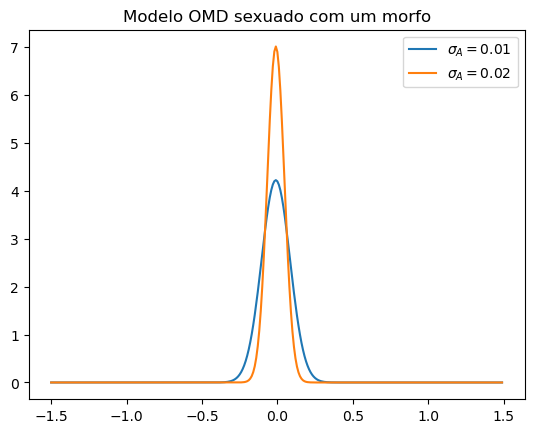

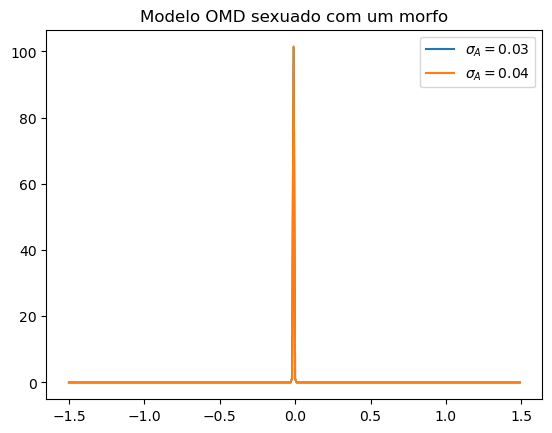

In [16]:
#Plotando
for sigmaA in vsigmaA:
    if sigmaA == 3e-2:
        plt.show()
    eq_1pico = cria_modelo_OMD_1_pico(b0, s, d0, w, sigmaA, sigmaf)
    y_omd = solve_ivp(eq_1pico, (0, temp), x0, method="Radau")
    plt.plot(z, densidade(z, y_omd.y[:,-1], 1), label=f"$\sigma_A =$"+str(sigmaA))
    plt.title(r"Modelo OMD sexuado com um morfo")
    plt.legend()